In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pa

In [4]:
#Read the Air'ünt cantent/Airbnb Open Datacar (ctrl dició
df = pd.read_csv("Airbnb_Open_Data.csv", low_memory = False)

In [5]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5224 entries, 0 to 5223
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5224 non-null   int64  
 1   NAME                            5166 non-null   object 
 2   host id                         5224 non-null   int64  
 3   host_identity_verified          5151 non-null   object 
 4   host name                       5204 non-null   object 
 5   neighbourhood group             5197 non-null   object 
 6   neighbourhood                   5208 non-null   object 
 7   lat                             5216 non-null   float64
 8   long                            5216 non-null   float64
 9   country                         5174 non-null   object 
 10  country code                    5145 non-null   object 
 11  instant_bookable                5145 non-null   object 
 12  cancellation_policy             51

In [7]:
df.duplicated().value_counts()

,count
False,7855


In [6]:
#Neighbourhood group was 'brookin Instead of "Brooklyn"
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,6/24/2019,1.34,4.0,3.0,47.0,NaN,NaN


In [21]:
# Drop duplicate records
df.drop_duplicates(inplace=True)

# Drop house_rules and license columns with insufficient data
df.drop(['house_rules', 'license'], axis=1, inplace=True, errors='ignore')

# Drop all records with missing values
df.dropna(inplace=True)

# Remove all dollar signs and commas in the price and service fee columns
df['price'] = df['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['service fee'] = df['service fee'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# Change all mismatched data types to the appropriate ones
df['price'] = df['price'].astype(float)
df['service fee'] = df['service fee'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)

# Rename the price and service fee columns to include a dollar sign
df.rename(columns={'price': 'price_$', 'service fee': 'service_fee_$'}, inplace=True)

df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'
df = df.drop(df[df['availability 365']>500].index)

display(df.head())

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,2009,1060.0,212.0,45.0,49.0,2017-10-05,0.40,5.0,1.0,219.0


In [20]:
# Re-load the data to ensure a fresh start
df = pd.read_csv("Airbnb_Open_Data.csv", low_memory=False, encoding='latin1')

In [22]:
df.duplicated().value_counts()

,count
False,4235


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4235 entries, 0 to 5222
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              4235 non-null   object        
 1   NAME                            4235 non-null   object        
 2   host id                         4235 non-null   object        
 3   host_identity_verified          4235 non-null   object        
 4   host name                       4235 non-null   object        
 5   neighbourhood group             4235 non-null   object        
 6   neighbourhood                   4235 non-null   object        
 7   lat                             4235 non-null   float64       
 8   long                            4235 non-null   float64       
 9   country                         4235 non-null   object        
 10  country code                    4235 non-null   object        
 11  instant_b

In [24]:
df.describe()

,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235,4235.000000,4235.000000,4235.000000,4235.000000
mean,40.728463,-73.960244,2012.359622,617.802597,123.561039,9.017473,58.897993,2018-05-22 00:19:22.880755456,0.889986,2.999292,2.582527,207.327745
min,40.508680,-74.239860,2003.000000,50.000000,10.000000,-12.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.688300,-73.984240,2007.000000,323.500000,65.000000,2.000000,8.000000,2017-08-19 00:00:00,0.140000,2.000000,1.000000,97.000000
50%,40.722120,-73.959700,2012.000000,619.000000,124.000000,3.000000,26.000000,2019-04-21 00:00:00,0.440000,3.000000,1.000000,208.000000
75%,40.762945,-73.944265,2017.000000,912.000000,182.000000,5.000000,80.000000,2019-06-19 00:00:00,1.250000,4.000000,2.000000,316.000000
max,40.908040,-73.739550,2022.000000,1200.000000,240.000000,452.000000,607.000000,2022-05-21 00:00:00,10.000000,5.000000,96.000000,426.000000
std,0.051860,0.035412,5.750917,336.581715,67.324949,26.311229,75.485592,NaN,1.096274,1.426767,6.620596,125.483655


In [25]:
# Get the value counts of the 'room type' column
property_types = df['room type'].value_counts().to_frame()

# Display the result
display(property_types)

,count
room type,
Entire home/apt,2563
Private room,1619
Shared room,53


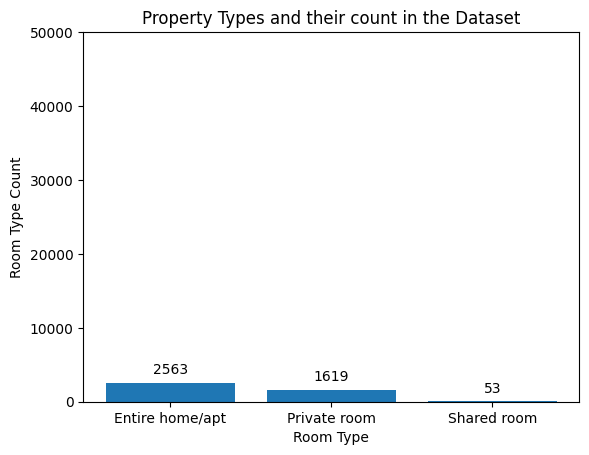

In [28]:
# Room type count plotted on a barchart

room_type_bar = plt.bar(property_types.index, property_types.loc[:, "count"])

plt.bar_label(room_type_bar, labels=property_types.loc[:, "count"], padding=4)

plt.ylim([0, 50000]) # Adjust y-limit based on max count

plt.xlabel('Room Type')

plt.ylabel('Room Type Count')

plt.title('Property Types and their count in the Dataset')

plt.show()

In [29]:
hood_group = df['neighbourhood group'].value_counts().to_frame()

display(hood_group)

,count
neighbourhood group,
Manhattan,1944
Brooklyn,1917
Queens,294
Bronx,57
Staten Island,23


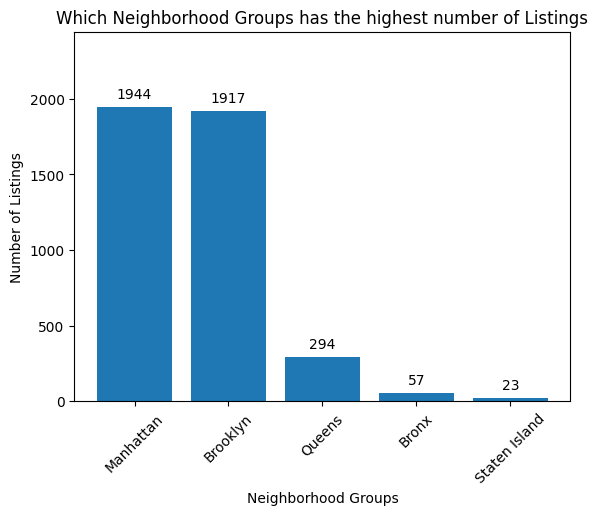

In [30]:
# Plot the number of listings per neighborhood group on a barchart

hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:, "count"])

plt.bar_label(hood_group_bar, labels=hood_group.loc[:, "count"], padding=4)

plt.ylim([0, hood_group['count'].max() + 500]) # Adjust y-limit based on max count

plt.xlabel('Neighborhood Groups')

plt.ylabel('Number of Listings')

plt.xticks(rotation=45)

plt.title('Which Neighborhood Groups has the highest number of Listings')

plt.show()

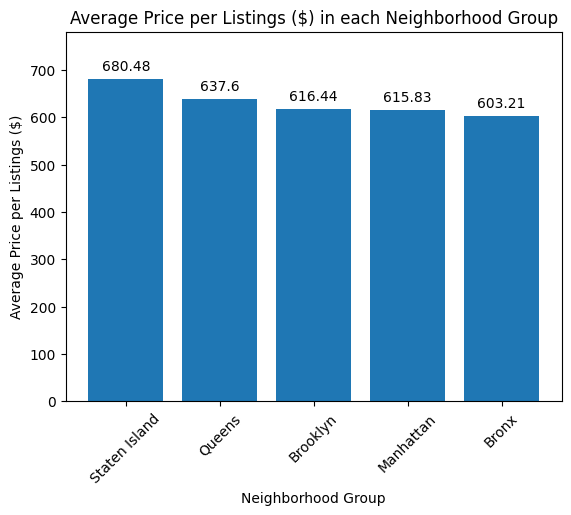

In [31]:
# Calculate the average price per neighborhood group
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()

# Plot the average price per neighborhood group on a bar chart
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:, 'price_$'])

plt.bar_label(avg_price_bar, labels=round(avg_price.loc[:, "price_$"], 2), label_type='edge', padding=4)

plt.ylim([0, avg_price['price_$'].max() + 100]) # Adjust y-limit based on max average price

plt.xlabel('Neighborhood Group')

plt.ylabel('Average Price per Listings ($)')

plt.xticks(rotation=45)

plt.title('Average Price per Listings ($) in each Neighborhood Group')

plt.show()

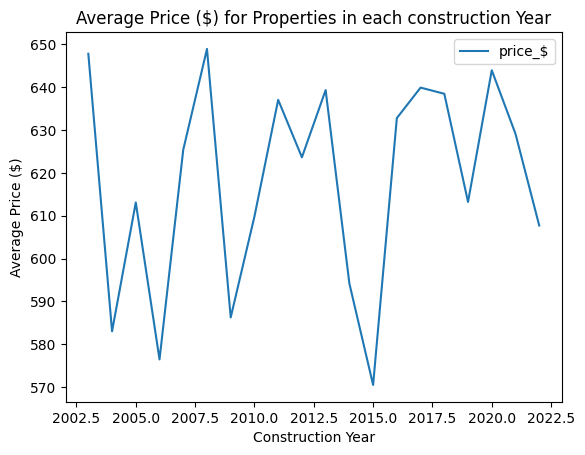

In [32]:
# Is there a relationship between the construction year of property and price?

df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot()

plt.xlabel('Construction Year')

plt.ylabel('Average Price ($)')

plt.title('Average Price ($) for Properties in each construction Year')

plt.show()

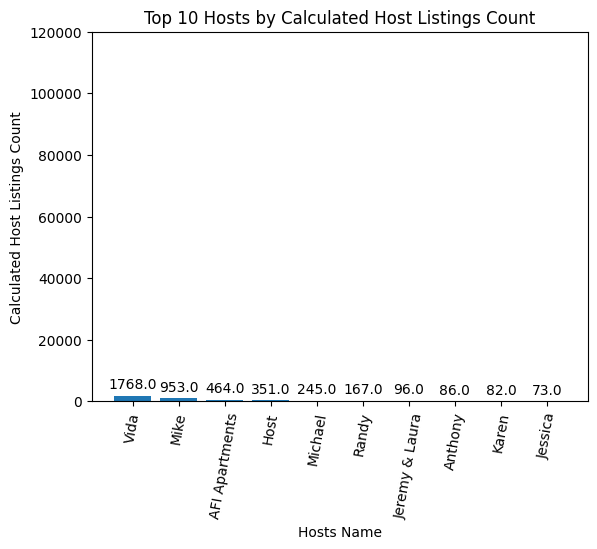

In [34]:
# Who are the top 10 hosts by calculated host listing count?

hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()

hosts_bar = plt.bar(hosts.index, hosts.loc[:, 'calculated host listings count'])

plt.bar_label(hosts_bar, labels=hosts.loc[:, 'calculated host listings count'], label_type='edge', padding=3)

plt.xlabel('Hosts Name')

plt.ylabel('Calculated Host Listings Count')

plt.xticks(rotation=80)

plt.ylim([0, 120000])

plt.title('Top 10 Hosts by Calculated Host Listings Count')

plt.show()

In [35]:
# Are hosts with verified identities more likely to receive positive reviews?

review = df.groupby("host_identity_verified")['review rate number'].mean().sort_values(ascending=False).to_frame()

display(review)

,review rate number
host_identity_verified,
unconfirmed,3.033734
verified,2.963303


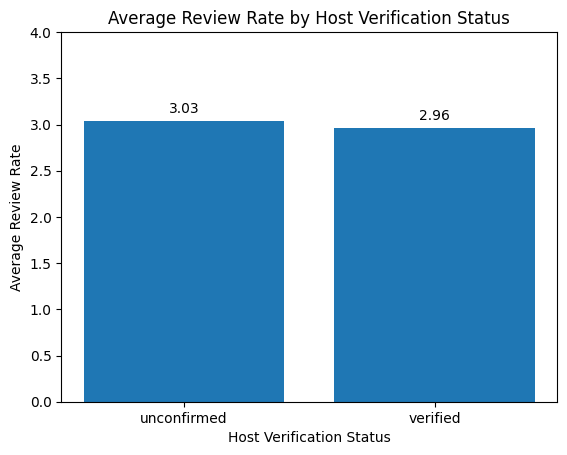

In [36]:
# Plot the average review rate for each host verification status on a bar chart

review_bar = plt.bar(review.index, review.loc[:, "review rate number"])

plt.bar_label(review_bar, labels=round(review.loc[:, "review rate number"], 2), padding=4)

plt.ylim([0, 4])

plt.xlabel('Host Verification Status')

plt.ylabel('Average Review Rate')

plt.title('Average Review Rate by Host Verification Status')

plt.show()

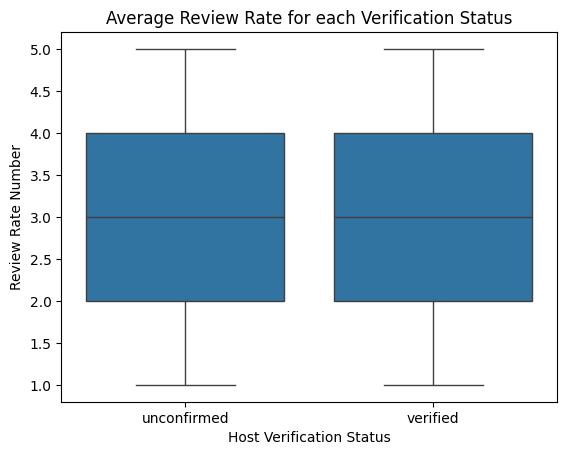

In [38]:
# Create a box plot to visualize the distribution of review rates by host identity verification status
base_color = sns.color_palette()[0]

sns.boxplot(data=df, x="host_identity_verified", y="review rate number", color=base_color)

plt.xlabel('Host Verification Status')

plt.ylabel('Review Rate Number')

plt.title('Average Review Rate for each Verification Status')

plt.show()

In [39]:
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999912999880597)

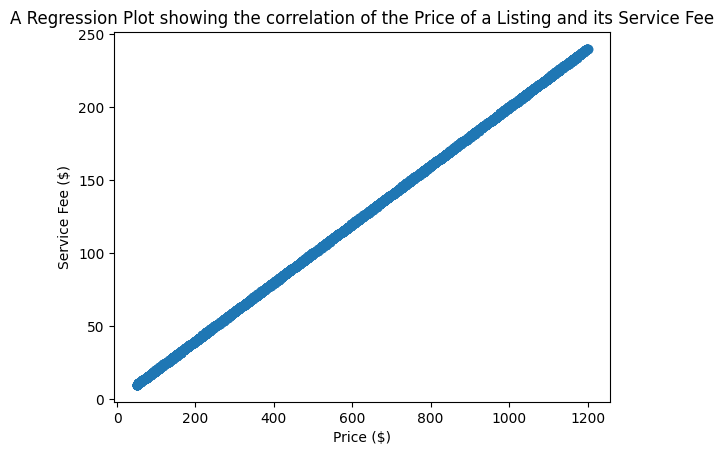

In [40]:
# Create a regression plot to show the correlation between price and service fee
sns.regplot(data=df, x='price_$', y='service_fee_$')

plt.xlabel('Price ($)')

plt.ylabel('Service Fee ($)')

plt.title('A Regression Plot showing the correlation of the Price of a Listing and its Service Fee')

plt.show()

In [41]:
ARRN =df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()

display(ARRN)

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            2.941176
                    Private room               3.000000
                    Shared room                1.000000
Brooklyn            Entire home/apt            2.943686
                    Private room               3.088033
                    Shared room                2.555556
Manhattan           Entire home/apt            3.020178
                    Private room               3.039823
                    Shared room                2.851852
Queens              Entire home/apt            2.801587
                    Private room               2.981481
                    Shared room                3.333333
Staten Island       Entire home/apt            2.777778
                    Private room               2.428571

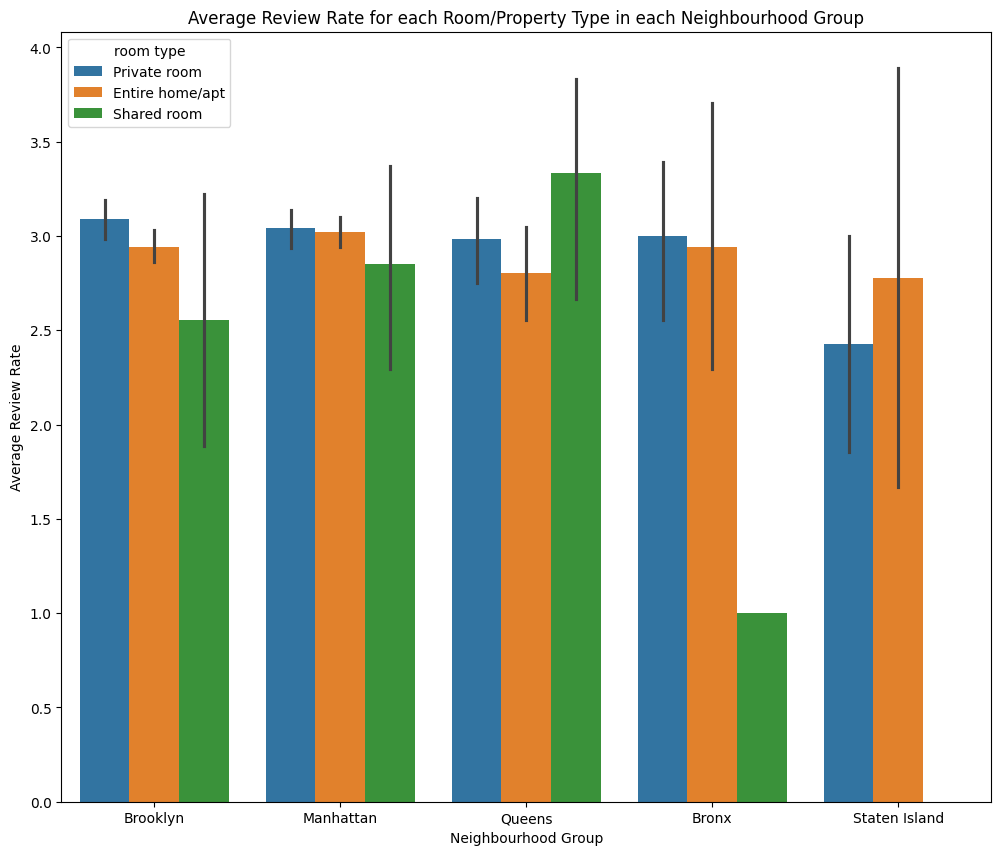

In [42]:
plt.figure(figsize=(12, 10))

sns.barplot(data=df, x='neighbourhood group', y='review rate number', hue='room type')

plt.xlabel('Neighbourhood Group')

plt.ylabel('Average Review Rate')

plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group')

plt.show()

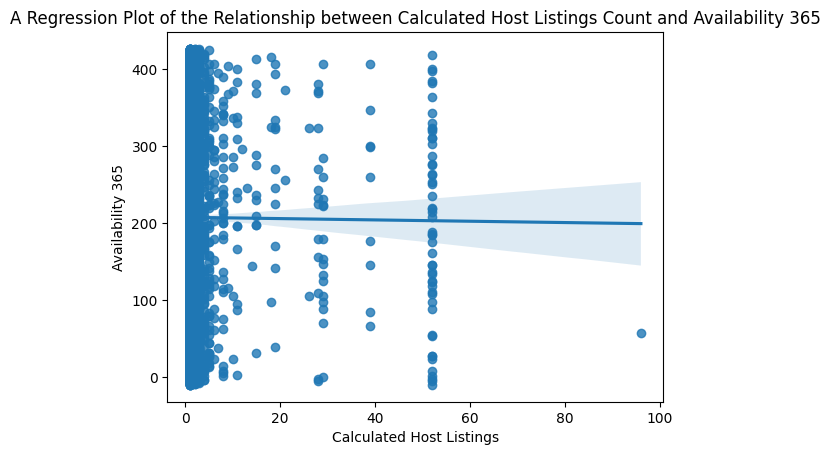

In [44]:
# Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

sns.regplot(data=df, x='calculated host listings count', y='availability 365')

plt.xlabel('Calculated Host Listings')

plt.ylabel('Availability 365')

plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365')

plt.show()

In [45]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(-0.004522391210185164)